In [2]:
!pip install -r requirements.txt

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 48.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 54.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 49.3 MB/s eta 0:00:0

### Import the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the data
data = pd.read_csv('data/first_25000_rows.csv')

# Display the first few rows of the data
data.head()

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,...,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,symbol
0,2024-10-21T11:54:29.221230963Z,2024-10-21T11:54:29.221064336Z,10,2,38,C,B,1,233.62,2,...,155,1,7,233.25,234.13,55,400,2,1,AAPL
1,2024-10-21T11:54:29.223936626Z,2024-10-21T11:54:29.223769812Z,10,2,38,A,B,0,233.67,2,...,155,1,7,233.25,234.13,55,400,2,1,AAPL
2,2024-10-21T11:54:29.225196809Z,2024-10-21T11:54:29.225030400Z,10,2,38,A,B,0,233.67,3,...,155,1,7,233.25,234.13,55,400,2,1,AAPL
3,2024-10-21T11:54:29.712600612Z,2024-10-21T11:54:29.712434212Z,10,2,38,A,B,2,233.52,200,...,155,1,7,233.25,234.13,55,400,2,1,AAPL
4,2024-10-21T11:54:29.764839221Z,2024-10-21T11:54:29.764673165Z,10,2,38,C,B,2,233.52,200,...,155,1,7,233.25,234.13,55,400,2,1,AAPL


### Best-Level OFI

In [2]:
from ofiFeatures import calculate_best_level_ofi, calculate_multi_level_ofi, calculate_integrated_ofi, calculate_cross_asset_ofi

First few rows with OFI:
                         ts_event  best_bid_size  best_ask_size  \
0  2024-10-21T11:54:29.221064336Z            139            200   
1  2024-10-21T11:54:29.223769812Z            141            200   
2  2024-10-21T11:54:29.225030400Z            144            200   
3  2024-10-21T11:54:29.712434212Z            144            200   
4  2024-10-21T11:54:29.764673165Z            144            200   

   bid_size_change  ask_size_change  ofi  
0              NaN              NaN  0.0  
1              2.0              0.0  2.0  
2              3.0              0.0  3.0  
3              0.0              0.0  0.0  
4              0.0              0.0  0.0  


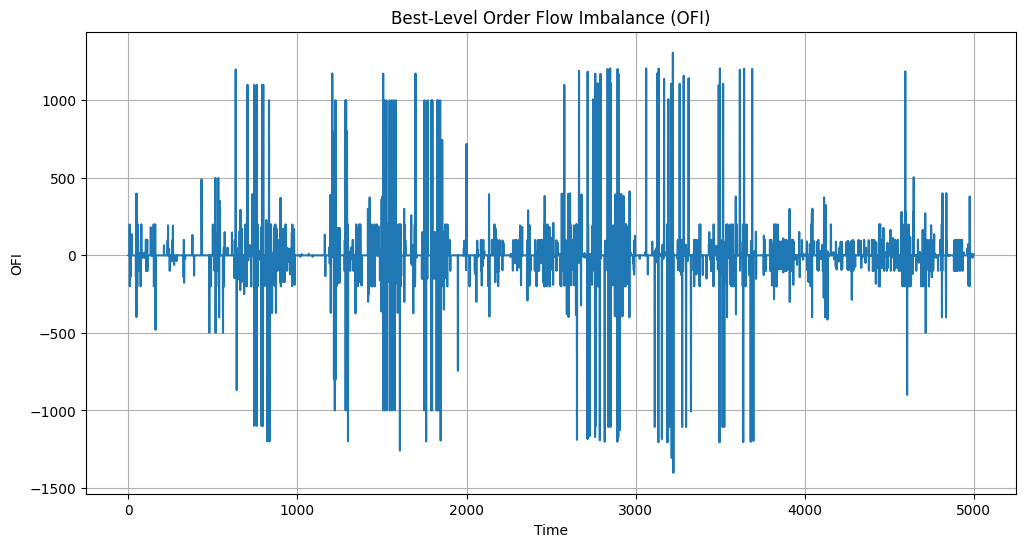

OFI Statistics:
count    5000.000000
mean        0.009600
std       184.346089
min     -1402.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1307.000000
Name: ofi, dtype: float64


In [3]:
# Code to get best OFI and then print its values and plot it
data_with_ofi = calculate_best_level_ofi(data)

print("First few rows with OFI:")
print(data_with_ofi[['ts_event', 'best_bid_size', 'best_ask_size', 'bid_size_change', 'ask_size_change', 'ofi']].head())

plt.figure(figsize=(12, 6))
plt.plot(data_with_ofi['ofi'].values)
plt.title('Best-Level Order Flow Imbalance (OFI)')
plt.xlabel('Time')
plt.ylabel('OFI')
plt.grid(True)
plt.show()

print("OFI Statistics:")
print(data_with_ofi['ofi'].describe())

### Multi-Level OFI

First few rows with Multi-Level OFI:
                         ts_event  multi_level_ofi
0  2024-10-21T11:54:29.221064336Z         0.000000
1  2024-10-21T11:54:29.223769812Z         2.000000
2  2024-10-21T11:54:29.225030400Z         3.000000
3  2024-10-21T11:54:29.712434212Z       188.352907
4  2024-10-21T11:54:29.764673165Z      -188.352907


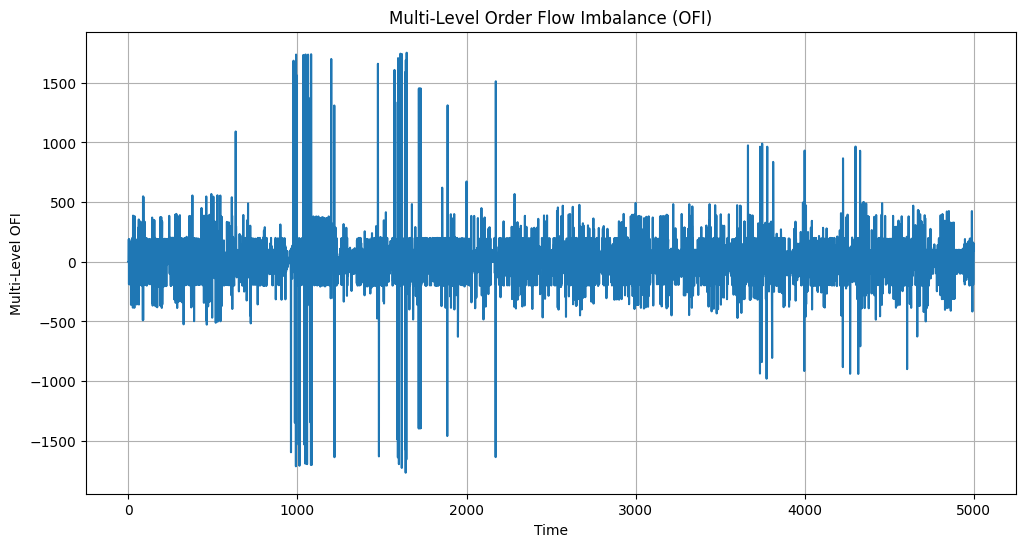

Multi Level OFI Statistics:
count    5000.000000
mean        1.659039
std       238.849042
min     -1768.216962
25%       -95.122942
50%         0.000000
75%        95.122942
max      1751.893707
Name: multi_level_ofi, dtype: float64


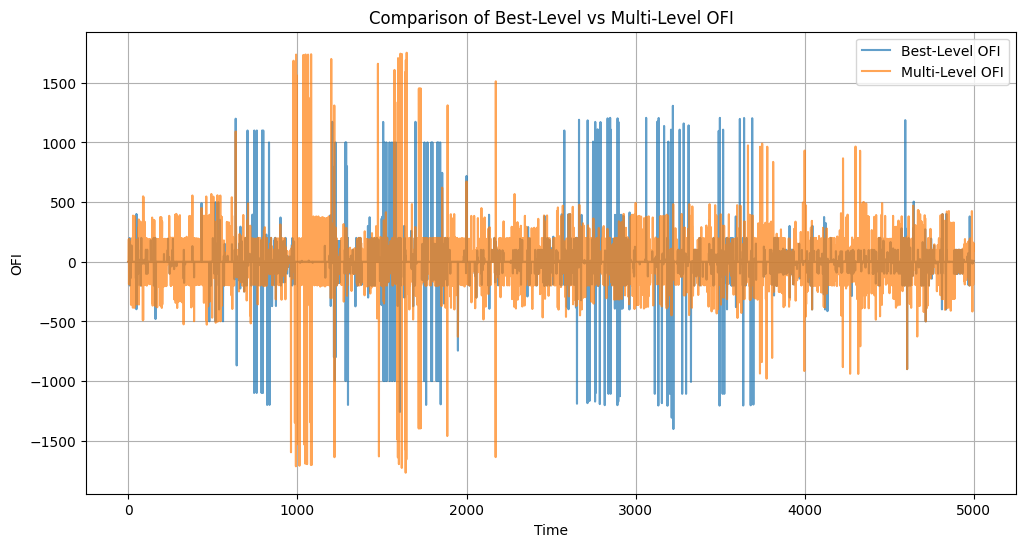

Correlation between Best-Level and Multi-Level OFI: 0.09531591090490707


In [10]:
# Code to get multi-level OFI and then print its values and plot it vs best level OFI
data_with_multi_ofi = calculate_multi_level_ofi(data)

print("First few rows with Multi-Level OFI:")
print(data_with_multi_ofi[['ts_event', 'multi_level_ofi']].head())

plt.figure(figsize=(12, 6))
plt.plot(data_with_multi_ofi['multi_level_ofi'].values)
plt.title('Multi-Level Order Flow Imbalance (OFI)')
plt.xlabel('Time')
plt.ylabel('Multi-Level OFI')
plt.grid(True)
plt.show()

print("Multi Level OFI Statistics:")
print(data_with_multi_ofi['multi_level_ofi'].describe())

plt.figure(figsize=(12, 6))
plt.plot(data_with_ofi['ofi'].values, label='Best-Level OFI', alpha=0.7)
plt.plot(data_with_multi_ofi['multi_level_ofi'].values, label='Multi-Level OFI', alpha=0.7)
plt.title('Comparison of Best-Level vs Multi-Level OFI')
plt.xlabel('Time')
plt.ylabel('OFI')
plt.legend()
plt.grid(True)
plt.show()

# Calculate correlation between Best-Level and Multi-Level OFI
correlation = data_with_ofi['ofi'].corr(data_with_multi_ofi['multi_level_ofi'])
print(f"Correlation between Best-Level and Multi-Level OFI: {correlation}")

                          ts_recv                        ts_event  rtype  \
0  2024-10-21T11:54:29.221230963Z  2024-10-21T11:54:29.221064336Z     10   
1  2024-10-21T11:54:29.223936626Z  2024-10-21T11:54:29.223769812Z     10   
2  2024-10-21T11:54:29.225196809Z  2024-10-21T11:54:29.225030400Z     10   
3  2024-10-21T11:54:29.712600612Z  2024-10-21T11:54:29.712434212Z     10   
4  2024-10-21T11:54:29.764839221Z  2024-10-21T11:54:29.764673165Z     10   

   publisher_id  instrument_id action side  depth   price  size  ...  \
0             2             38      C    B      1  233.62     2  ...   
1             2             38      A    B      0  233.67     2  ...   
2             2             38      A    B      0  233.67     3  ...   
3             2             38      A    B      2  233.52   200  ...   
4             2             38      C    B      2  233.52   200  ...   

   price_distance_08  ofi_08  weighted_ofi_08  bid_size_change_09  \
0              0.055     NaN             

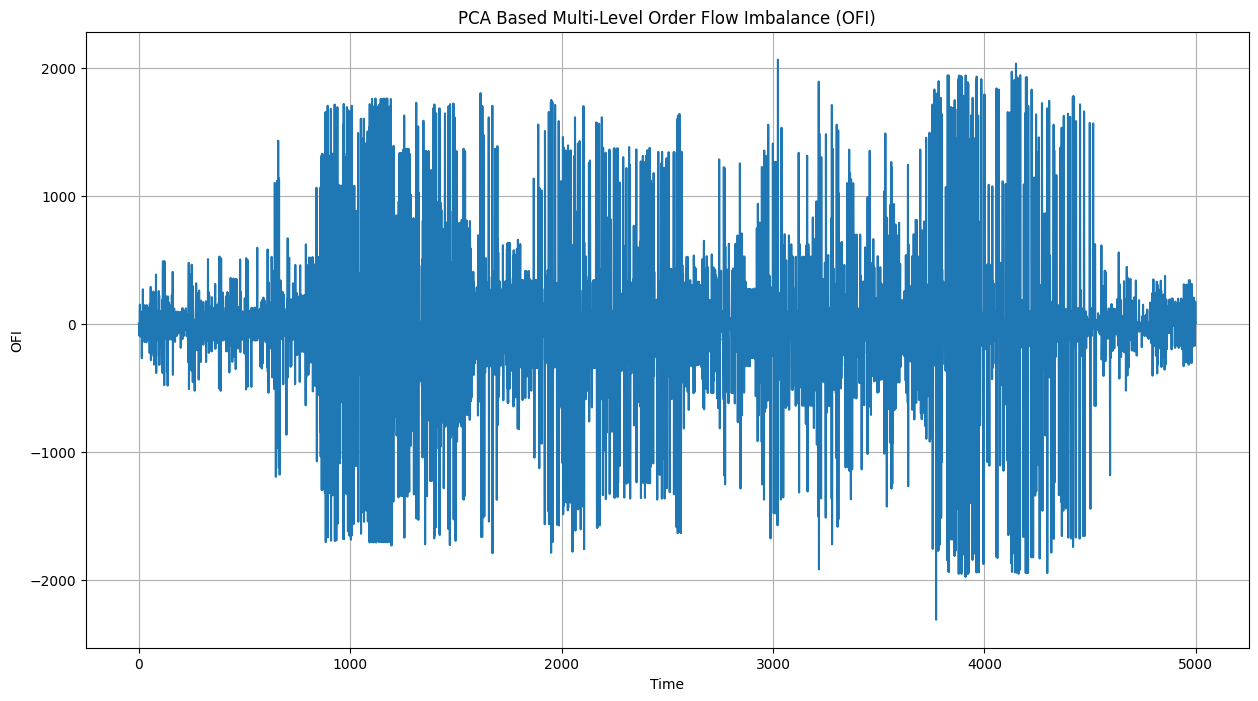

In [11]:
from ofiFeatures import calculate_multi_level_ofi_with_pca

# calculate multi level ofi with pca
data_with_multi_level_ofi_pca = calculate_multi_level_ofi_with_pca(data_with_ofi)

# view the first 5 rows of the data with multi level ofi with pca
print(data_with_multi_level_ofi_pca.head())
print(data_with_multi_level_ofi_pca.tail())
print(data_with_multi_level_ofi_pca.shape)

# plot the pca data similar to the plots above
plt.figure(figsize=(15, 8))
plt.plot(data_with_multi_level_ofi_pca['pca_1'].values)
plt.title('PCA Based Multi-Level Order Flow Imbalance (OFI)')
plt.xlabel('Time')
plt.ylabel('OFI')
plt.grid(True)
plt.show()

### Integrated OFI

Integrated OFI Stats:
1 s Integrated OFI:
count    5000.000000
mean        0.009600
std       184.346089
min     -1402.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1307.000000
Name: integrated_ofi_1s, dtype: float64
5 s Integrated OFI:
count    5000.00000
mean        0.00864
std        65.35155
min      -318.40000
25%        -2.00000
50%         0.00000
75%         2.40000
max       320.00000
Name: integrated_ofi_5s, dtype: float64
10 s Integrated OFI:
count    5000.000000
mean        0.009240
std        39.180091
min      -159.200000
25%        -7.425000
50%         0.000000
75%         7.300000
max       159.900000
Name: integrated_ofi_10s, dtype: float64
30 s Integrated OFI:
count    5000.000000
mean        0.002167
std        16.007482
min       -52.766667
25%        -4.241667
50%         0.000000
75%         4.675000
max        53.300000
Name: integrated_ofi_30s, dtype: float64
60 s Integrated OFI:
count    5000.000000
mean        0.001280
std    

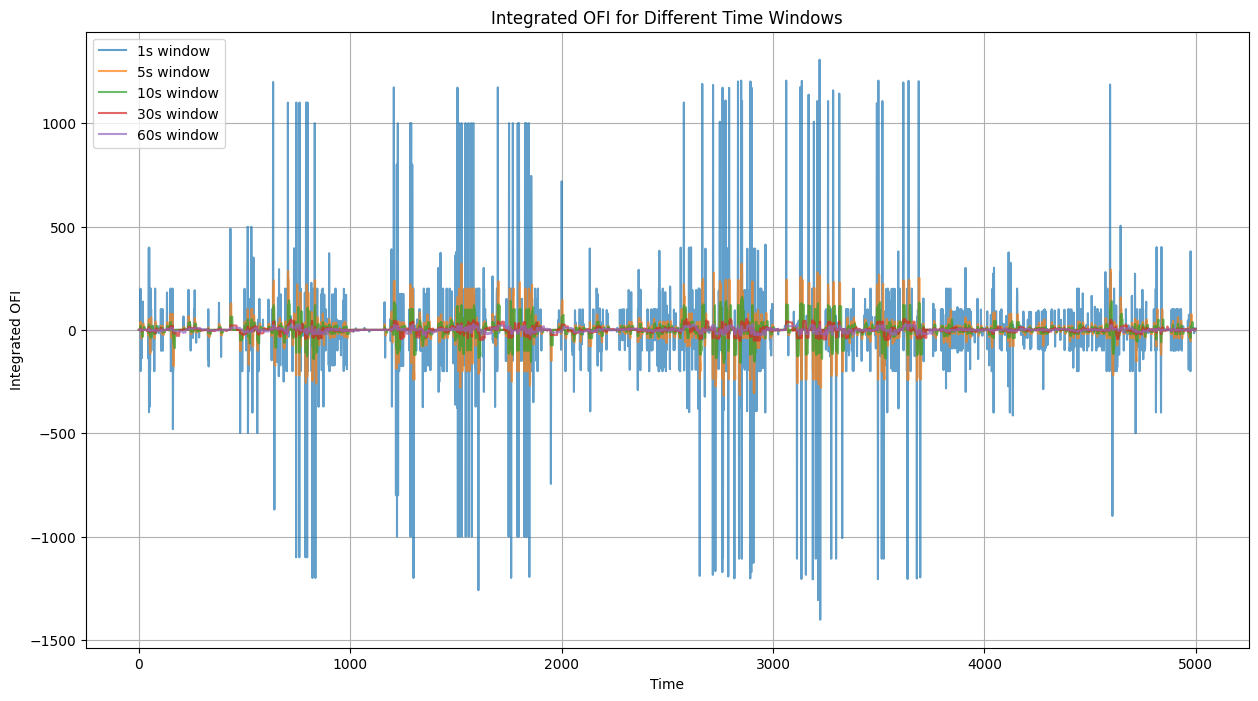

In [5]:
# Calculate Integrated OFI
data_with_integrated_ofi = calculate_integrated_ofi(data_with_ofi)

# Display integrated OFI statistics
print("Integrated OFI Stats:")
for window in [1, 5, 10, 30, 60]:
    print(f"{window} s Integrated OFI:")
    print(data_with_integrated_ofi[f'integrated_ofi_{window}s'].describe())

# Plot Integrated OFI for different windows
plt.figure(figsize=(15, 8))
for window in [1, 5, 10, 30, 60]:
    plt.plot(data_with_integrated_ofi[f'integrated_ofi_{window}s'].values, 
             label=f'{window}s window', alpha=0.7)
plt.title('Integrated OFI for Different Time Windows')
plt.xlabel('Time')
plt.ylabel('Integrated OFI')
plt.legend()
plt.grid(True)
plt.show()

### Cross-Asset OFI

In [13]:

# Calculate Cross-Asset OFI 
asset_pairs = [('AAPL', "")]

# UNABLE TO RUN THIS FUNCTION AS NO OTHER ASSETS ARE PRESENT IN THE DATA EXCEPT AAPL
data_with_cross_ofi = calculate_cross_asset_ofi(data_with_ofi, asset_pairs)

print("Cross Asset ofi stats")
for asset1, asset2 in asset_pairs:
    print(f"Cross ofi between {asset1} and {asset2}:")
    print(data_with_cross_ofi[f'cross_ofi_{asset1}_{asset2}'].describe())

# Plot Cross-Asset OFI
plt.figure(figsize=(12, 6))
for asset1, asset2 in asset_pairs:
    plt.plot(data_with_cross_ofi[f'cross_ofi_{asset1}_{asset2}'].values,
             label=f'Cross ofi {asset1} - {asset2}', alpha=0.7)
plt.title('Cross Asset OFI')
plt.xlabel('Time')
plt.ylabel('Cross Asset OFI')
plt.legend()
plt.grid(True)
plt.show()

KeyError: ''